In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_flight = pd.read_csv("flights.csv")

In [3]:
df_flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [4]:
# priniting the details about the datasets

print("\nEDA on df_flight\n")
print("#"*30)

print("\nFeatures/Columns : \n", df_flight.columns)
print("\n\nNumber of Features/Columns : ", len(df_flight.columns))
print("\nNumber of Rows : ",len(df_flight))
print("\n\nData Types :\n", df_flight.dtypes)

print("\n Contains NaN/Empty cells : ", df_flight.isnull().values.any())

print("\n Total empty cells by column :\n", df_flight.isnull().sum(), "\n\n")



EDA on df_flight

##############################

Features/Columns : 
 Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')


Number of Features/Columns :  19

Number of Rows :  336776


Data Types :
 year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

 Contains NaN/Empty cells :  True

 Total empty cells by column :
 year     

<AxesSubplot:>

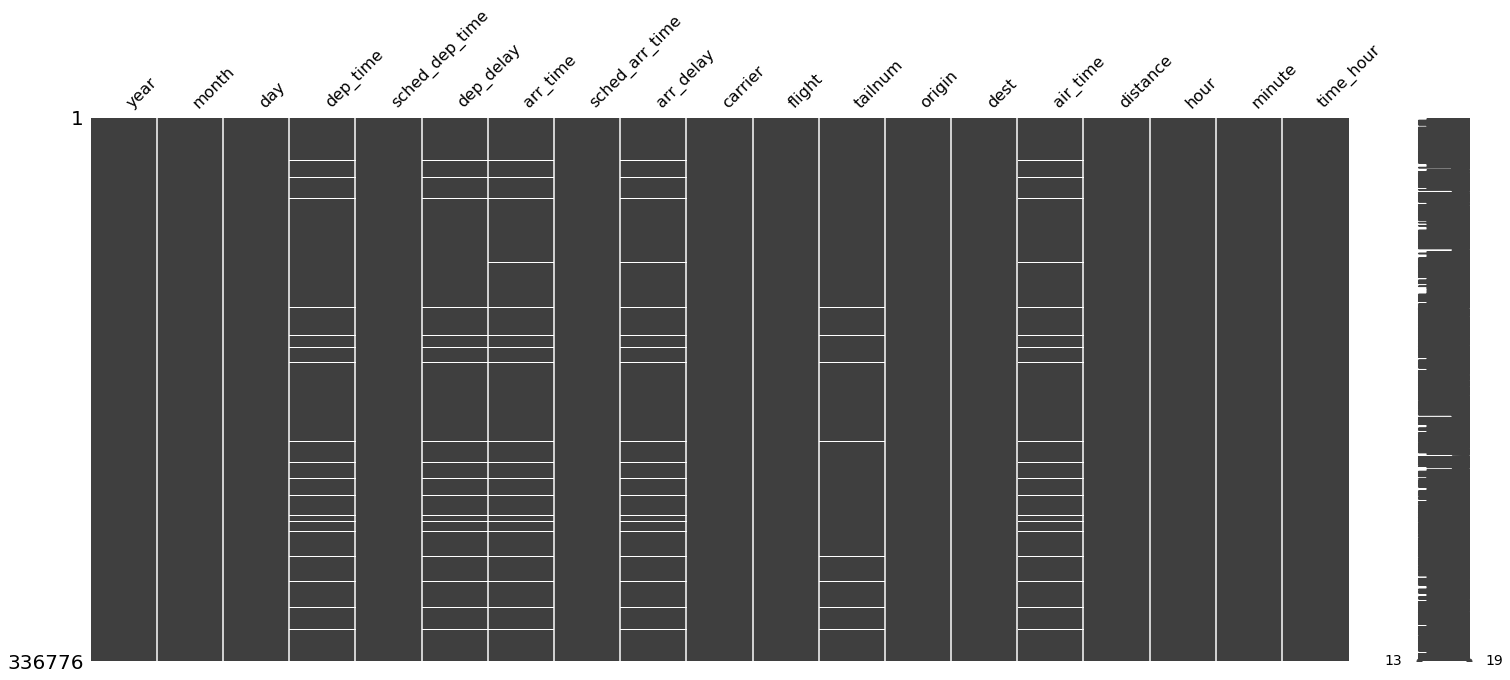

In [5]:
%matplotlib inline
import missingno as msno
msno.matrix(df_flight)

As per the chart we have missing values more related to dep_time , dep_delay ,arr_time,arr_delay, air_time . Mostly these flights might have cancelled and diverted.So we have missing info.

In [6]:
#Calculating missing Values percentage for train
round(100*(df_flight.isnull().sum()/len(df_flight.index)), 2)

year              0.00
month             0.00
day               0.00
dep_time          2.45
sched_dep_time    0.00
dep_delay         2.45
arr_time          2.59
sched_arr_time    0.00
arr_delay         2.80
carrier           0.00
flight            0.00
tailnum           0.75
origin            0.00
dest              0.00
air_time          2.80
distance          0.00
hour              0.00
minute            0.00
time_hour         0.00
dtype: float64

As we have missing values below 3 % so we can delete these values.

<Figure size 720x432 with 0 Axes>

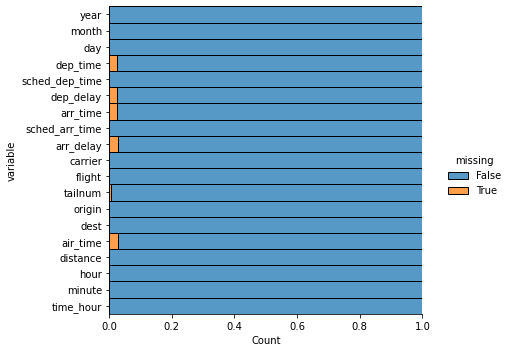

In [7]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_flight.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


In [8]:
df_clean = df_flight.dropna()

In [9]:
df_clean.isnull().values.any() # Check for null values

False

In [10]:
df_clean_EDA = df_clean

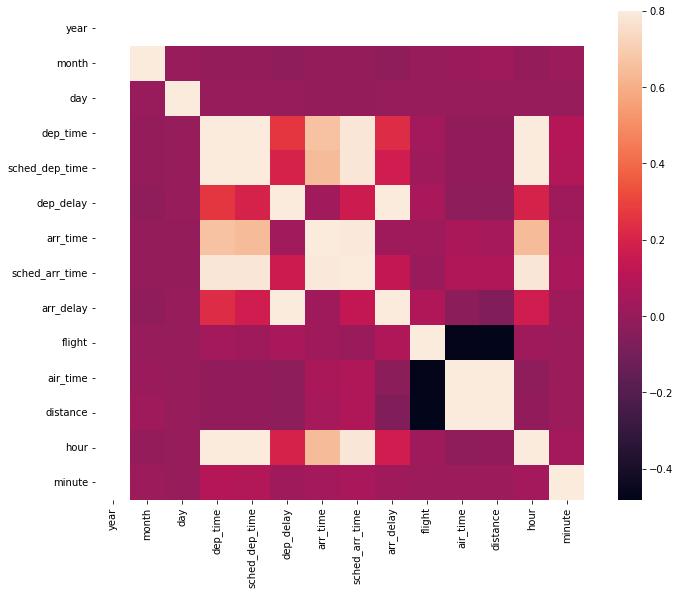

In [11]:
#correlation matrix
corrmat = df_clean_EDA.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

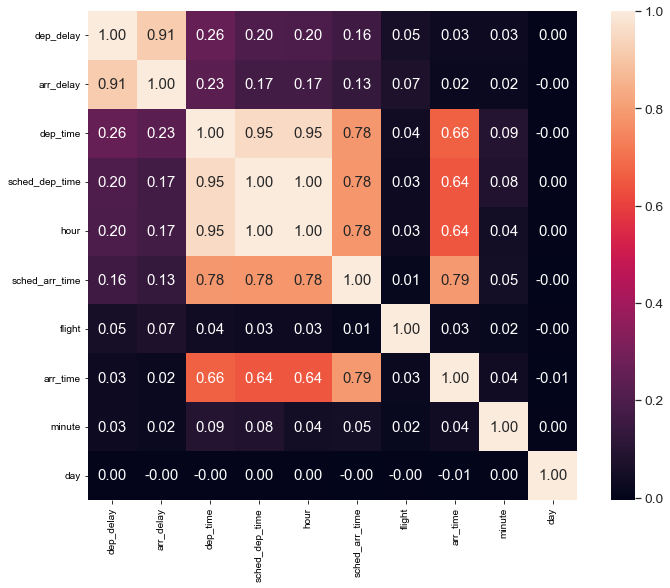

In [12]:
delcorrmat = df_clean_EDA.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'dep_delay')['dep_delay'].index
cm = np.corrcoef(df_clean_EDA[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

From above correlation plot we can see arr_delay and dep_delay are highly correlated,sheduled_dep_time and hour are higly correlated,schedule arrival time is highly correlated with dep_time,scheduled dep time and hor and arrival time.similarly scheduled departure time is highly correlated with dep_time,hour and scheduled_arr_time

In [13]:
for dataset in df_clean_EDA:
    df_clean_EDA.loc[df_clean_EDA['dep_delay'] <= 15, 'dep_delay_Status'] = 0
    df_clean_EDA.loc[df_clean_EDA['dep_delay'] >= 15, 'dep_delay_Status'] = 1
    df_clean_EDA.loc[df_clean_EDA['dep_delay'] >= 60, 'dep_delay_Status'] = 2

C:\Users\chait\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\chait\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


C:\Users\chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


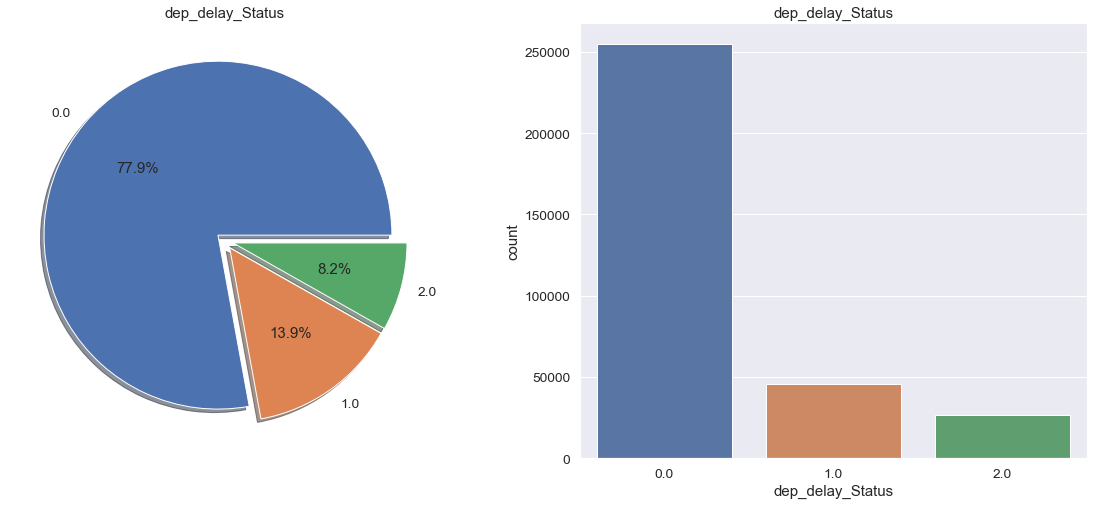

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df_clean_EDA['dep_delay_Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dep_delay_Status')
ax[0].set_ylabel('')
sns.countplot('dep_delay_Status',order = df_clean_EDA['dep_delay_Status'].value_counts().index, data=df_clean_EDA,ax=ax[1])
ax[1].set_title('dep_delay_Status')
plt.show()

As per the analysis around 78% flights are on-time, around 14 % are short delay and around 8% are delayed morethan 1 hourin departure.

In [15]:
df_clean

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_delay_Status
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,0.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,0.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,0.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,0.0
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,0.0
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,0.0
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,0.0


In [16]:
for dataset in df_clean_EDA:
    df_clean_EDA.loc[df_clean_EDA['arr_delay'] <= 15, 'arr_delay_Status'] = 0
    df_clean_EDA.loc[df_clean_EDA['arr_delay'] >= 15, 'arr_delay_Status'] = 1
    df_clean_EDA.loc[df_clean_EDA['arr_delay'] >= 60, 'arr_delay_Status'] = 2

C:\Users\chait\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\chait\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


C:\Users\chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


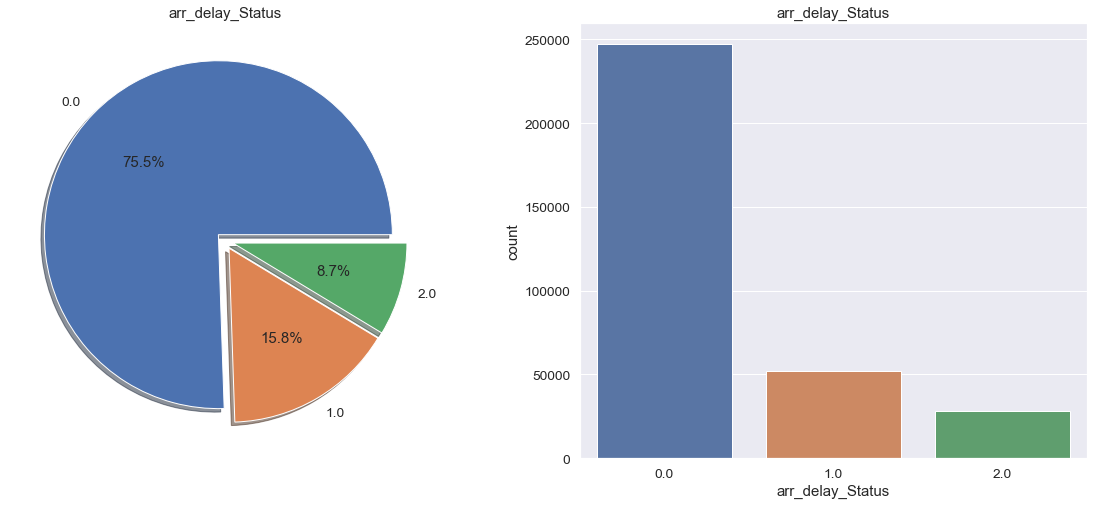

In [17]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df_clean_EDA['arr_delay_Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('arr_delay_Status')
ax[0].set_ylabel('')
sns.countplot('arr_delay_Status',order = df_clean_EDA['arr_delay_Status'].value_counts().index, data=df_clean_EDA,ax=ax[1])
ax[1].set_title('arr_delay_Status')
plt.show()

In [18]:
df_clean

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_delay_Status,arr_delay_Status
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,0.0,0.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,0.0,1.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,0.0,1.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0.0,0.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,...,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,0.0,0.0
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,...,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,0.0,0.0
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,...,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,0.0,0.0
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,0.0,0.0


As per the analysis around 76% flights are on-time, around 16 % are short delay and around 8.8% are delayed morethan 1 hourin Arrival.

In [19]:
Delayedflights = df_clean_EDA[(df_clean_EDA.dep_delay_Status >= 1) &(df_clean_EDA.dep_delay_Status < 3)]

C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


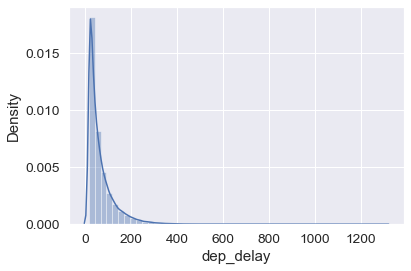

In [20]:
#histogram
sns.distplot(Delayedflights['dep_delay'])
plt.show()

In [21]:
#skewness and kurtosis
print("Skewness: %f" % Delayedflights['dep_delay'].skew())
print("Kurtosis: %f" % Delayedflights['dep_delay'].kurt())

Skewness: 3.157795
Kurtosis: 22.119851


It can be seen on the histogram and by the skewness and kurtosis indexes, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time

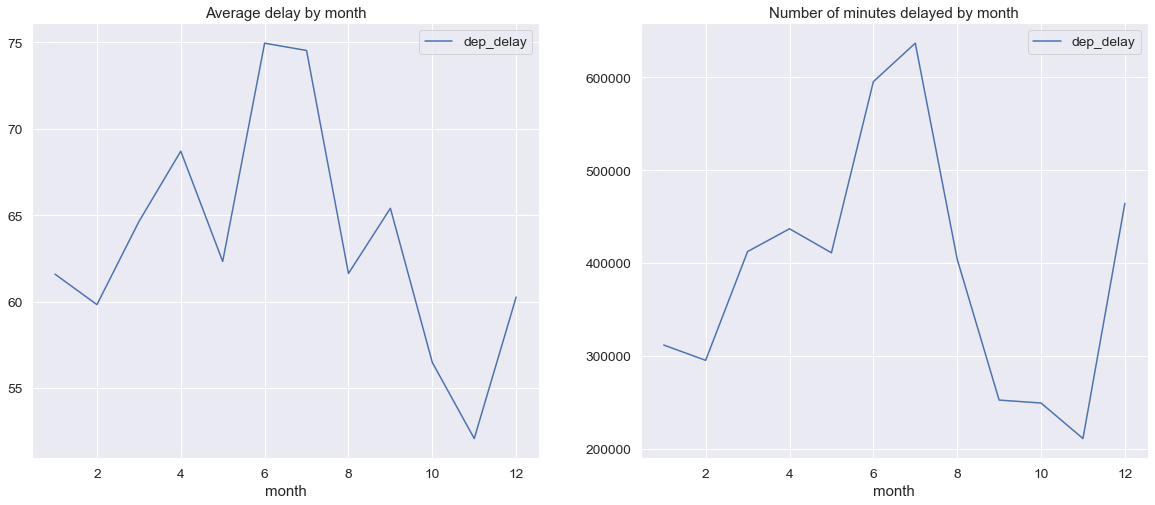

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['month','dep_delay']].groupby(['month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['month','dep_delay']].groupby(['month']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

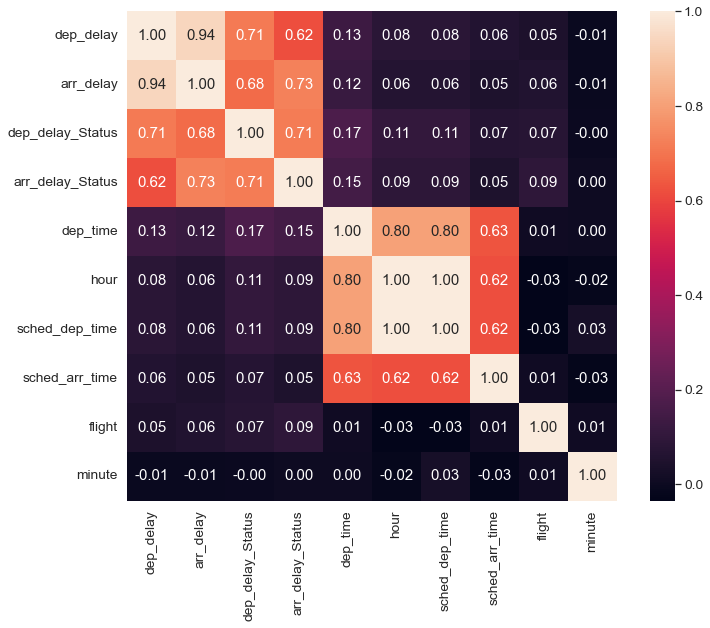

In [23]:
delcorrmat = Delayedflights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'dep_delay')['dep_delay'].index
cm = np.corrcoef(Delayedflights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:xlabel='flight'>

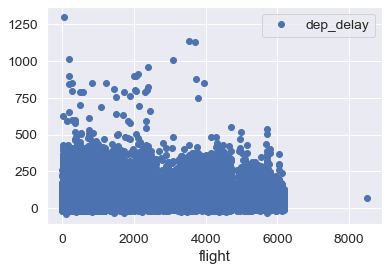

In [24]:
df_clean.plot(x='flight', y='dep_delay', style='o')

<AxesSubplot:xlabel='distance'>

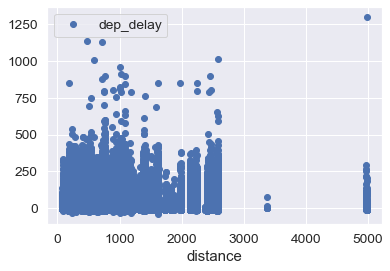

In [25]:
df_clean.plot(x='distance', y='dep_delay', style='o')

C:\Users\chait\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


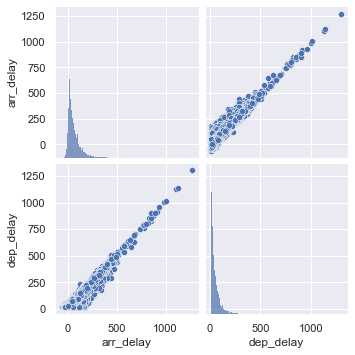

In [26]:
#scatterplot
sns.set()
cols = ['arr_delay', 'dep_delay']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()

In [27]:
print(df_clean['carrier'].value_counts())

UA    57782
B6    54049
EV    51108
DL    47658
AA    31947
MQ    25037
US    19831
9E    17294
WN    12044
VX     5116
FL     3175
AS      709
F9      681
YV      544
HA      342
OO       29
Name: carrier, dtype: int64


In [28]:
df_clean_EDA.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,dep_delay_Status,arr_delay_Status
count,327346.0,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000
mean,2013.0,6.564803,15.740825,1348.789883,1340.335098,12.555156,1501.908238,1532.788426,6.895377,1943.104501,150.686460,1048.371314,13.141010,26.234116,0.303110,0.331200
std,0.0,3.413444,8.777376,488.319979,467.413156,40.065688,532.888731,497.979124,44.633292,1621.523684,93.688305,735.908523,4.662063,19.295918,0.612363,0.628106
min,2013.0,1.000000,1.000000,1.000000,500.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,80.000000,5.000000,0.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,905.000000,-5.000000,1104.000000,1122.000000,-17.000000,544.000000,82.000000,509.000000,9.000000,8.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,1400.000000,1355.000000,-2.000000,1535.000000,1554.000000,-5.000000,1467.000000,129.000000,888.000000,13.000000,29.000000,0.000000,0.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1944.000000,14.000000,3412.000000,192.000000,1389.000000,17.000000,44.000000,0.000000,0.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000,2.000000,2.000000


In [29]:
# evaluation of a model using all input features
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [30]:
X = df_clean.drop(columns=['dep_delay', 'origin', 'dest', 'flight', 'carrier', 'tailnum', 'time_hour'])
y = df_clean['dep_delay']

C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py

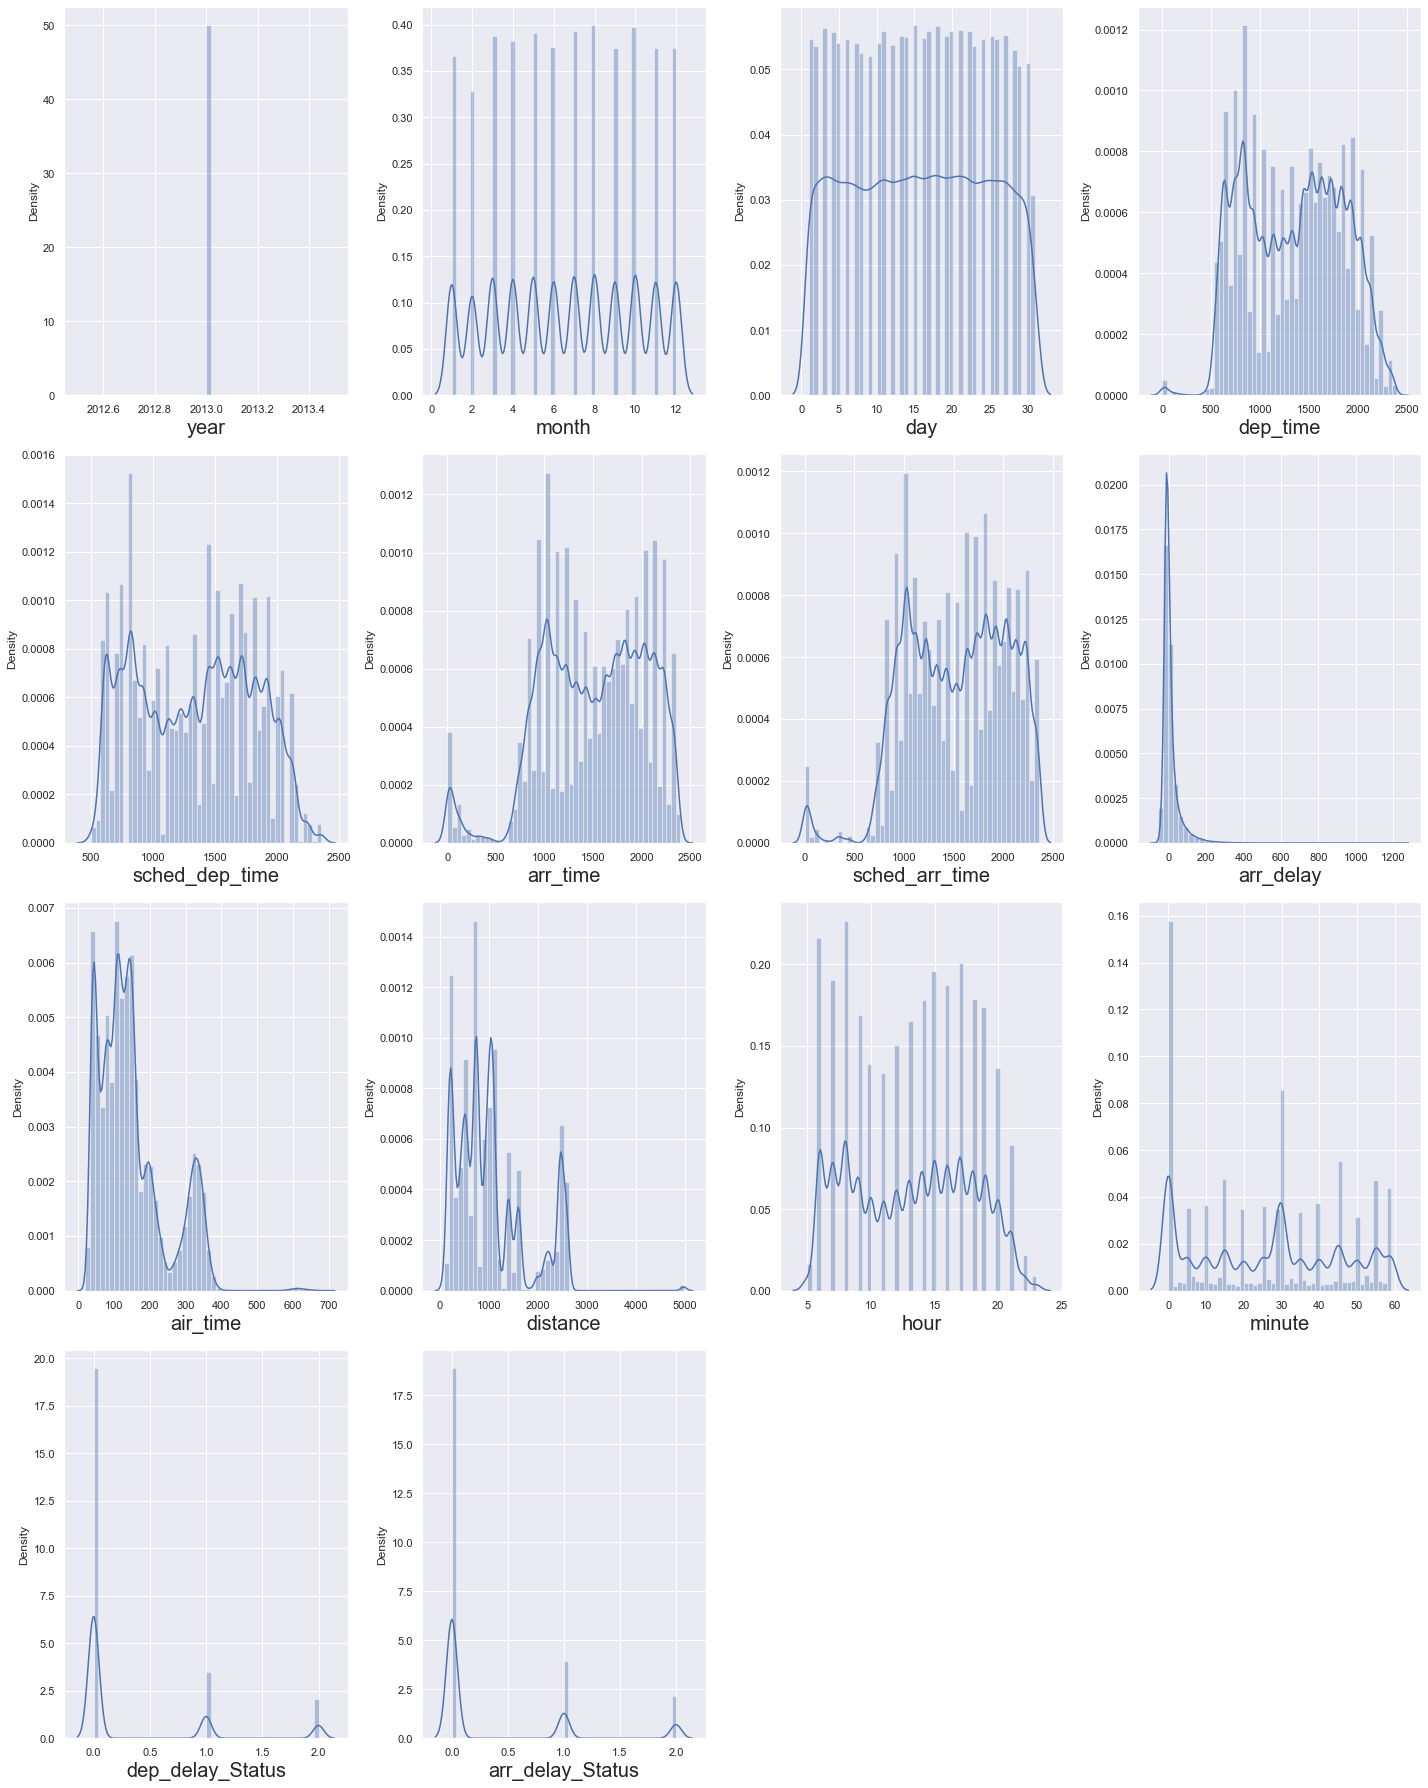

In [31]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [32]:
# evaluation of a model using all input features
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [33]:
X.dtypes

year                  int64
month                 int64
day                   int64
dep_time            float64
sched_dep_time        int64
arr_time            float64
sched_arr_time        int64
arr_delay           float64
air_time            float64
distance              int64
hour                  int64
minute                int64
dep_delay_Status    float64
arr_delay_Status    float64
dtype: object

In [34]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)
#X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns, index=X.index)

In [35]:
X_scaled

array([[ 0.        , -1.63026283, -1.67941389, ..., -0.58220259,
        -0.49498534, -0.52730021],
       [ 0.        , -1.63026283, -1.67941389, ...,  0.14334058,
        -0.49498534,  1.06478973],
       [ 0.        , -1.63026283, -1.67941389, ...,  0.71341022,
        -0.49498534,  1.06478973],
       ...,
       [ 0.        ,  0.7134145 ,  1.62453984, ...,  1.02435729,
        -0.49498534, -0.52730021],
       [ 0.        ,  0.7134145 ,  1.62453984, ...,  1.4907779 ,
        -0.49498534, -0.52730021],
       [ 0.        ,  0.7134145 ,  1.62453984, ...,  1.69807595,
        -0.49498534, -0.52730021]])

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

C:\Users\chait\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\chait\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [37]:
vif

,VIF,Features
0,NaN,year
1,1.005726,month
2,1.000148,day
3,13.150789,dep_time
4,inf,sched_dep_time
5,2.813648,arr_time
6,4.147862,sched_arr_time
7,3.795437,arr_delay
8,61.725606,air_time
9,61.627889,distance


We remove Year which has unique values ,air_time and distance features which has more variable inflation factor

In [38]:
X = X.drop(columns=['year', 'air_time', 'distance'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [40]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8985071473748907


Before removing the columns 'year', 'air_time', 'distance' R2 value is 0.87 and after removing R2 value improved to almost 90%

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=10,max_depth =10 )
model.fit(X,y)

ExtraTreesClassifier(max_depth=10, n_estimators=10)

In [42]:
print(model.feature_importances_)

[0.01193918 0.01056792 0.11620177 0.04769124 0.02744466 0.02394878
 0.08848799 0.02638563 0.02929042 0.48454521 0.1334972 ]


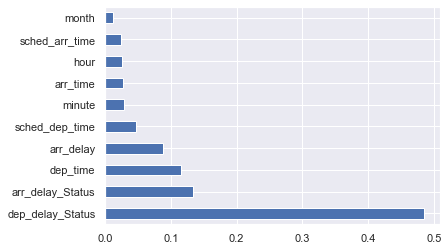

In [43]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Status,status1,arr_delay,dep_time,hour,arr_time,scheduled_dep_time.schedules_arr_time,minute,months are important features for the model.

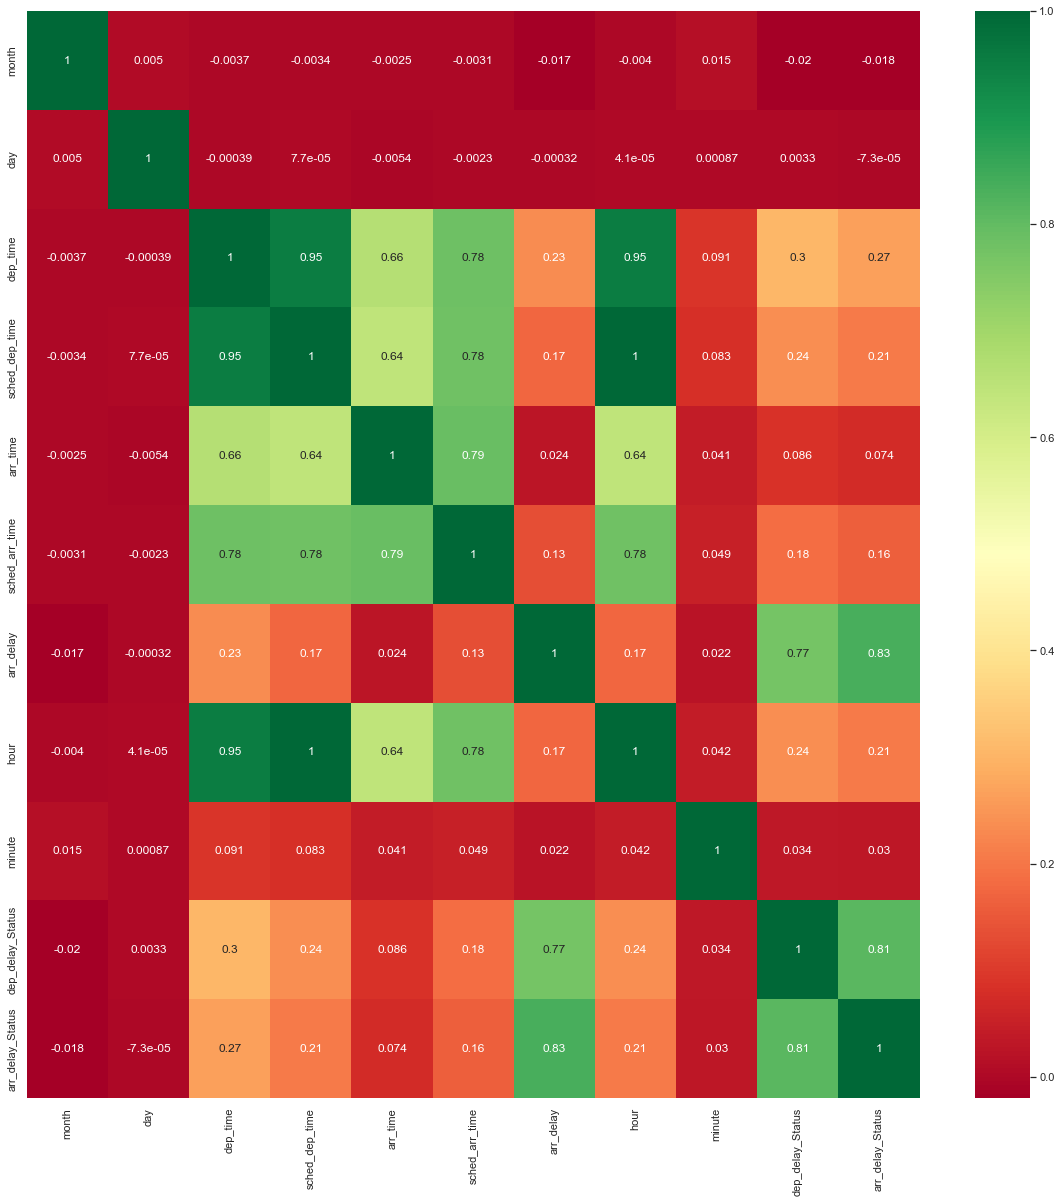

In [44]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [46]:
df_clean.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'dep_delay_Status', 'arr_delay_Status'],
      dtype='object')

In [47]:
X = df_clean.drop(columns=['arr_delay', 'origin', 'dest', 'flight', 'carrier', 'tailnum', 'time_hour','year','air_time','distance'])
y = df_clean['arr_delay']

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=10,max_depth =10 )
model.fit(X,y)

ExtraTreesClassifier(max_depth=10, n_estimators=10)

In [49]:
print(model.feature_importances_)

[0.02272778 0.01878532 0.03288545 0.02642611 0.0895086  0.05144154
 0.04357195 0.02136536 0.01817159 0.1747966  0.50031968]


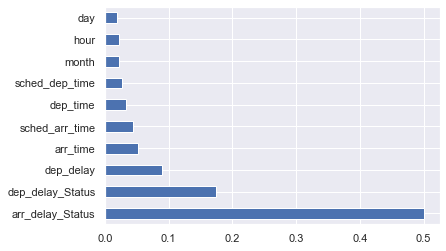

In [50]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

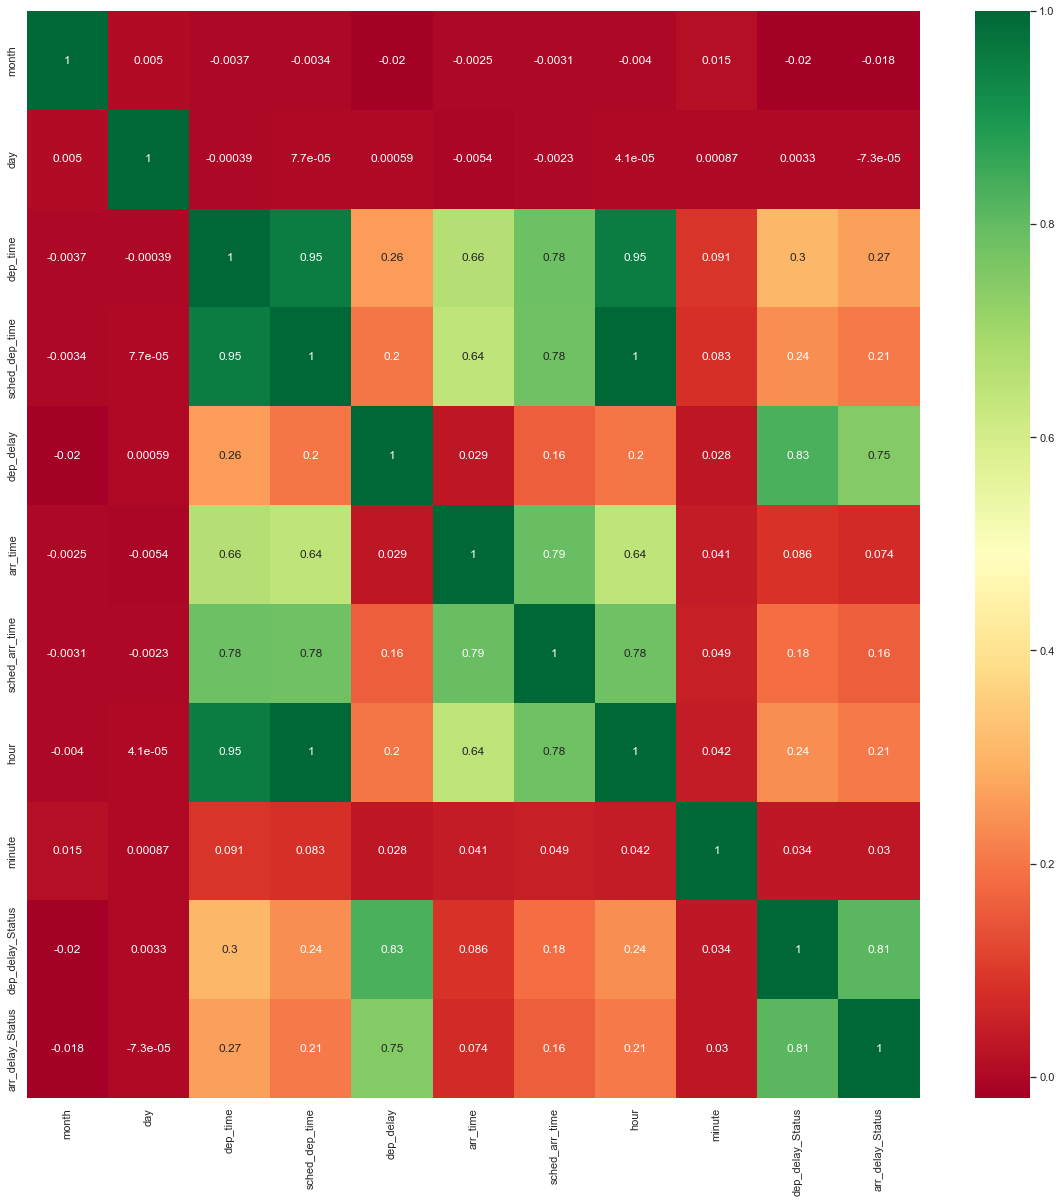

In [51]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### For second part of question


In [52]:
df_clean['is_dep_delay'] = np.where(df_clean['dep_delay'] > 30.0, True, False)

C:\Users\chait\AppData\Local\Temp/ipykernel_16444/3392736909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['is_dep_delay'] = np.where(df_clean['dep_delay'] > 30.0, True, False)


In [53]:
df_clean

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,dep_delay_Status,arr_delay_Status,is_dep_delay
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,0.0,0.0,False
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,0.0,1.0,False
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,0.0,1.0,False
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0.0,0.0,False
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,...,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,0.0,0.0,False
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,...,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,0.0,0.0,False
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,...,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,0.0,0.0,False
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,0.0,0.0,False


In [54]:
df_clean['is_dep_delay'].unique()

array([False,  True])

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logisticRegr = LogisticRegression()

In [57]:
X = df_clean.drop(columns=['dep_delay', 'origin', 'dest', 'flight', 'carrier', 'tailnum', 'time_hour', 'is_dep_delay','year', 'air_time', 'distance'])
y = df_clean['is_dep_delay']


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [59]:
logisticRegr = LogisticRegression(class_weight='balanced')
  
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9180566247540843


C:\Users\chait\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
pred = logisticRegr.predict(X_test)

In [61]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[64300  5657]
 [ 1049 10831]]


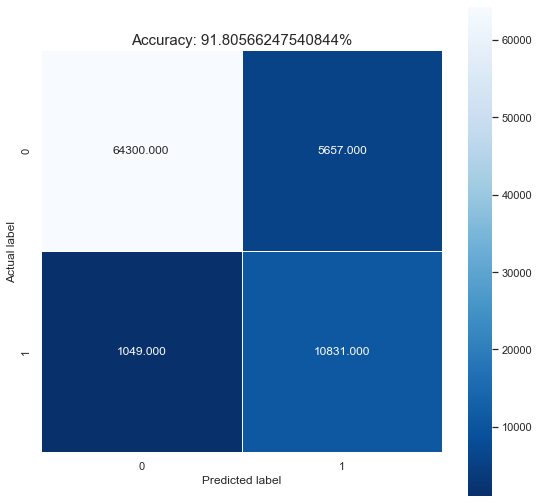

In [62]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy: {0}%'.format(score*100)
plt.title(all_sample_title, size = 15);

In [63]:
from sklearn.metrics import precision_recall_fscore_support

In [64]:
precision_recall_fscore_support(y_test, pred, average='weighted')

(0.9364716052442923, 0.9180566247540843, 0.9233165867605927, None)

In [65]:
!pip install six
!pip install pydotplus

In [66]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


In [67]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier( min_samples_split= 2)
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
# accuracy of our classification tree
clf.score(X_test,y_test)

0.9883793394186003

In [69]:
#let's first visualize the tree on the data without doing any pre processing
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24)

In [70]:
clf2.score(X_test,y_test)

0.9776018182484695

In [71]:
rand_clf = RandomForestClassifier(random_state=6)

In [72]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [73]:
rand_clf.score(X_test,y_test)

0.9833571611862605

In [74]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [75]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=3,n_jobs =-1,verbose = 3)

In [76]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 20736 candidates, totalling 62208 fits


KeyboardInterrupt: 

In [ ]:
#let's see the best parameters as per our grid search
grid_search.best_params_

In [ ]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 12,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 90,random_state=6)

In [ ]:
rand_clf.fit(x_train,y_train)

In [ ]:
rand_clf.score(x_test,y_test)